In [12]:
# %%capture --no-stderr
# %pip install -U langgraph langchain-openai

In [1]:
import dotenv
import os

In [2]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env(os.getenv("OPENAI_API_KEY"))

In [3]:
exa_api_key = os.getenv("EXA_API_KEY")

In [4]:
# First we initialize the model we want to use.
from langchain_openai import ChatOpenAI

model = ChatOpenAI(model="gpt-4o", temperature=0)


# For this tutorial we will use custom tool that returns pre-defined values for weather in two cities (NYC & SF)

from typing import Literal

from langchain_core.tools import tool

In [5]:
from exa_py import Exa


exa = Exa(api_key=os.environ["EXA_API_KEY"])


@tool
def search_and_contents(query: str):
    """Search for webpages based on the query and retrieve their contents."""
    # This combines two API endpoints: search and contents retrieval
    return exa.search_and_contents(
        query, use_autoprompt=True, num_results=5, text=True, highlights=True
    )

In [6]:
tools = [search_and_contents]


# Define the graph

from langgraph.prebuilt import create_react_agent

graph = create_react_agent(model, tools=tools, )


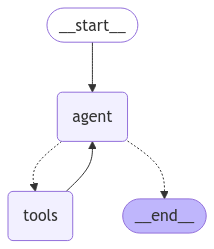

In [7]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [8]:
def print_stream(stream):
    for s in stream:
        message = s["messages"][-1]
        if isinstance(message, tuple):
            print(message)
        else:
            message.pretty_print()

**ReAct Prompting Result**

In [9]:
inputs = {"messages": [("user", "whats the waether like in harlem newyork ?")]}
print_stream(graph.stream(inputs, stream_mode="values"))

================================ Human Message =================================

whats the waether like in harlem newyork ?
================================== Ai Message ==================================
Tool Calls:
  search_and_contents (call_web6sf3JKnFQbH69Tr2zN77M)
 Call ID: call_web6sf3JKnFQbH69Tr2zN77M
  Args:
    query: current weather in Harlem, New York
================================= Tool Message =================================
Name: search_and_contents

Title: New York City, NY Hourly Weather Forecast | Weather Underground
URL: https://www.wunderground.com/hourly/us/ny/harlem/10027
ID: https://www.wunderground.com/hourly/us/ny/harlem/10027
Score: None
Published Date: 2025-01-29T15:15:56.000Z
Author: 
Image: None
Favicon: None
Extras: None
Subpages: None
Text: The time period when the sun is no more than 6 degrees below the horizon at either sunrise or sunset. The horizon should be clearly defined and the brightest stars should be visible under good atmospheric conditio

**OpenAI Simple Request**

In [11]:
import requests

API_KEY = os.getenv("OPENAI_API_KEY")
URL = "https://api.openai.com/v1/chat/completions"

headers = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json"
}

data = {
    "model": "gpt-4o",
    "messages": [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "whats the waether like in harlem newyork ?"}
    ],
    "temperature": 0.7
}

response = requests.post(URL, headers=headers, json=data)

if response.status_code == 200:
    print(response.json()["choices"][0]["message"]["content"])
else:
    print(f"Error {response.status_code}: {response.text}")


I'm sorry, but I can't provide real-time weather updates or forecasts. However, you can check the current weather in Harlem, New York, by using a weather website or app such as the Weather Channel, AccuWeather, or a search engine with location-based weather services.
